## Objective
To build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

In [2]:
df_og=pd.read_csv("INNHotelsGroup.csv")
data=df_og.copy()
data.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00000,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55000,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61000,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90000,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44000,3,Not_Canceled


## Data Overview

- Observations
- Sanity checks

In [3]:
data.shape

(36275, 19)

#### Observations
* Dataset contains 36276 rows and 19 columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

#### Observation
* The distributuon of data types for the columns is:
    - 5 categorical dtypes
    - 13 integer dtypes
    - 1 float dtype

In [5]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000
mean,1.84496,0.10528,0.81072,2.20430,0.03099,85.23256,2017.82043,7.42365,15.59700,0.02564,0.02335,0.15341,103.42354,0.61966
std,0.51871,0.40265,0.87064,1.41090,0.17328,85.93082,0.38384,3.06989,8.74045,0.15805,0.36833,1.75417,35.08942,0.78624
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2017.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,2.00000,0.00000,0.00000,1.00000,0.00000,17.00000,2018.00000,5.00000,8.00000,0.00000,0.00000,0.00000,80.30000,0.00000
50%,2.00000,0.00000,1.00000,2.00000,0.00000,57.00000,2018.00000,8.00000,16.00000,0.00000,0.00000,0.00000,99.45000,0.00000
75%,2.00000,0.00000,2.00000,3.00000,0.00000,126.00000,2018.00000,10.00000,23.00000,0.00000,0.00000,0.00000,120.00000,1.00000
max,4.00000,10.00000,7.00000,17.00000,1.00000,443.00000,2018.00000,12.00000,31.00000,1.00000,13.00000,58.00000,540.00000,5.00000


In [6]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

#### Observation
* No missing data 

In [7]:
data.duplicated().sum()

0

#### Observations
* No duplicate values


In [8]:
# Dropping ID column since it offers no statistical insights
data.drop(["Booking_ID"], axis=1, inplace=True)
data.sample(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
1510,2,1,0,1,Meal Plan 1,0,Room_Type 1,1,2018,5,3,Online,0,0,0,142.00000,2,Not_Canceled
28898,2,0,1,5,Meal Plan 1,0,Room_Type 1,37,2018,2,15,Online,0,0,0,79.80000,1,Not_Canceled
13389,2,0,1,5,Meal Plan 1,0,Room_Type 1,51,2018,11,15,Online,0,0,0,88.40000,0,Canceled
36161,1,0,0,1,Meal Plan 1,0,Room_Type 1,73,2018,10,28,Offline,0,0,0,62.00000,0,Not_Canceled
34740,2,0,2,2,Meal Plan 1,0,Room_Type 1,44,2018,4,30,Online,0,0,0,121.61000,0,Not_Canceled
3679,2,0,2,2,Not Selected,0,Room_Type 1,148,2018,4,23,Online,0,0,0,80.75000,1,Not_Canceled
19885,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2018,1,27,Complementary,1,0,15,0.00000,2,Not_Canceled
20637,2,0,1,2,Not Selected,0,Room_Type 1,18,2018,3,18,Online,0,0,0,97.00000,0,Canceled
9643,2,0,2,2,Meal Plan 1,0,Room_Type 1,9,2018,12,4,Online,0,0,0,88.40000,2,Not_Canceled
11667,2,0,0,2,Meal Plan 2,0,Room_Type 1,39,2017,8,14,Offline,0,0,0,109.00000,0,Not_Canceled


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Univariate Analysis

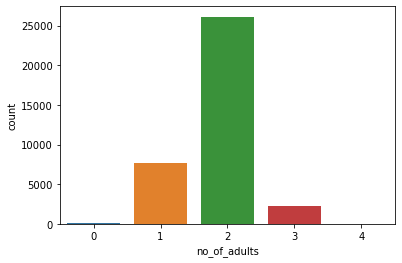

In [9]:
sns.countplot(data=data, x="no_of_adults");

#### Observation
* Most bookings was made for 2 adults

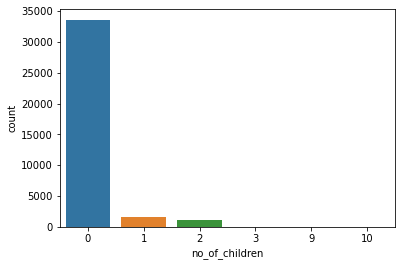

In [10]:
sns.countplot(data=data, x="no_of_children");

#### Observation
* Most bookings did not include children(over 32500) of them

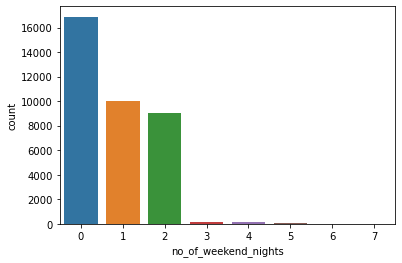

In [11]:
sns.countplot(data=data, x="no_of_weekend_nights");

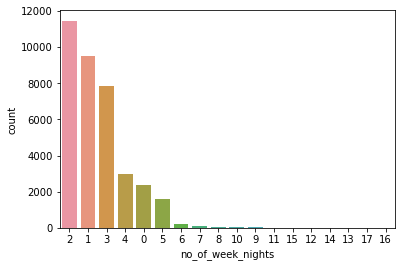

In [12]:
sns.countplot(data=data, x="no_of_week_nights", order=data.no_of_week_nights.value_counts().index);

#### Observations
* Most customers prefered to spend 2 weeknights in the hotel with no weekend nights.

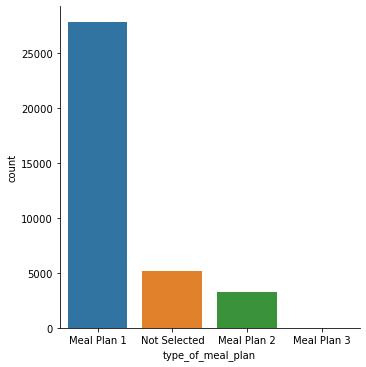

In [13]:
sns.catplot(data=data, x="type_of_meal_plan", kind="count");

#### Observation
* Meal plan 1( Breakfast only) was the most popular option

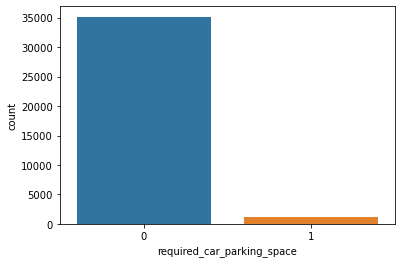

In [14]:
sns.countplot(data=data, x="required_car_parking_space");

#### Observation
* Most guests did not require parking spaces for their vehicles

<Figure size 720x1080 with 0 Axes>

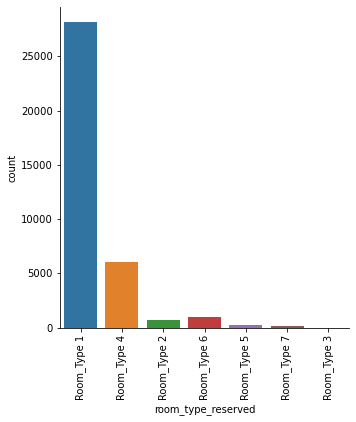

In [15]:
plt.figure(figsize=(10,15));
sns.catplot(data=data, x="room_type_reserved", kind="count");
plt.xticks(rotation=90);

#### Observations
* Room type 1 was the most popular choice

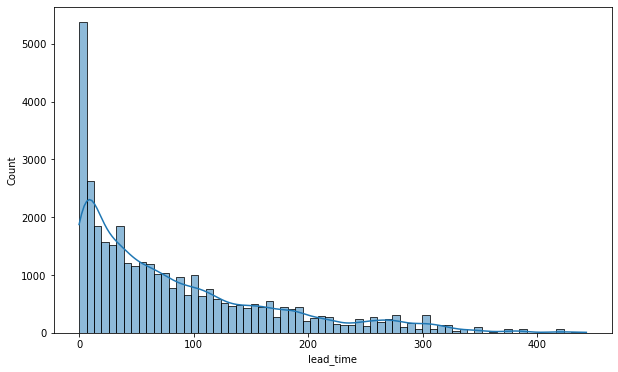

In [16]:
plt.figure(figsize=(10,6));
sns.histplot(data=data, x="lead_time", kde=True);

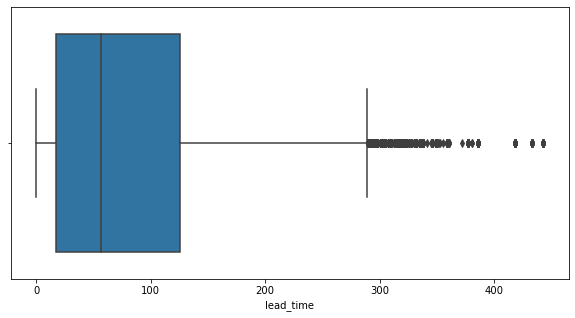

In [17]:
plt.figure(figsize=(10,5));
sns.boxplot(data=data, x="lead_time");

#### Observations
* Distribution of the time difference between booking date and stay start date is heavily skewed to the right

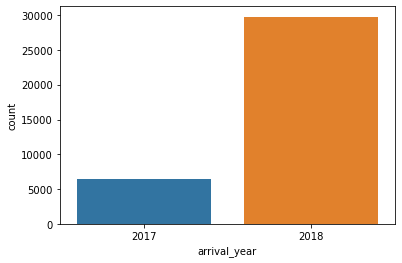

In [18]:
sns.countplot(data=data, x="arrival_year");

#### Observations
* Most bookings were done in 2018

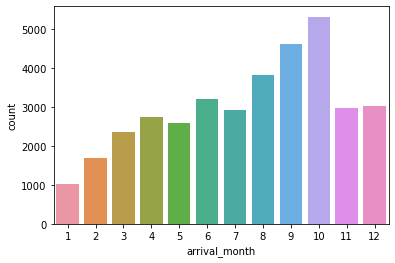

In [19]:
sns.countplot(data=data, x="arrival_month");

#### Observations
* October was the most popular month to stay in the hotel. Followd by September

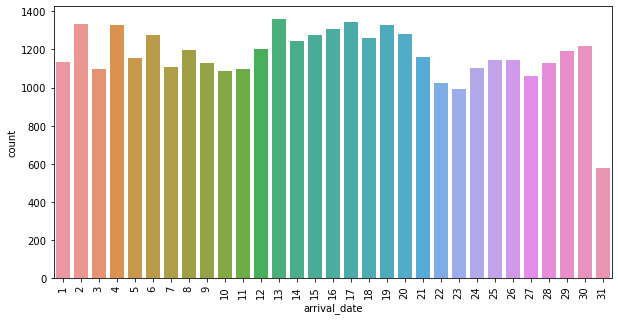

In [20]:
plt.figure(figsize=(10,5));
sns.countplot(data=data, x="arrival_date");
plt.xticks(rotation=90);

#### Observations
* Most stays at the hotel started in the middle of the month

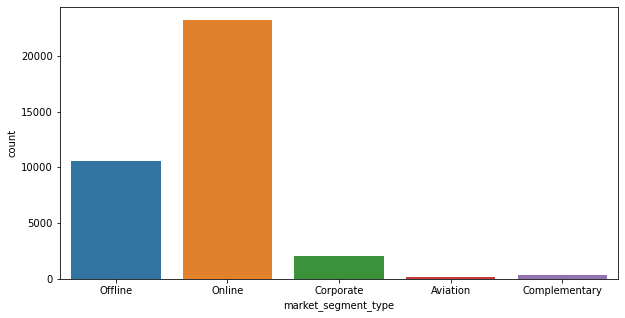

In [21]:
plt.figure(figsize=(10,5));
sns.countplot(data=data, x="market_segment_type");

#### Observations
* Online market type was the most common booking made

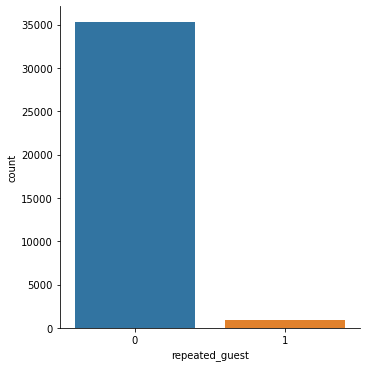

In [22]:
sns.catplot(data=data, x="repeated_guest", kind="count");

#### Observations
* Most guests were staying for the first time

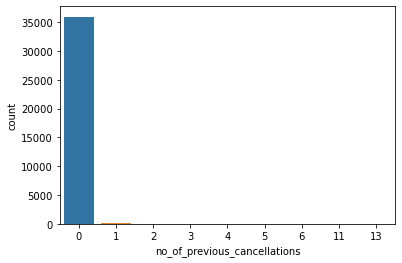

In [23]:
sns.countplot(data=data, x="no_of_previous_cancellations");

In [24]:
data.no_of_previous_cancellations.value_counts()

0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

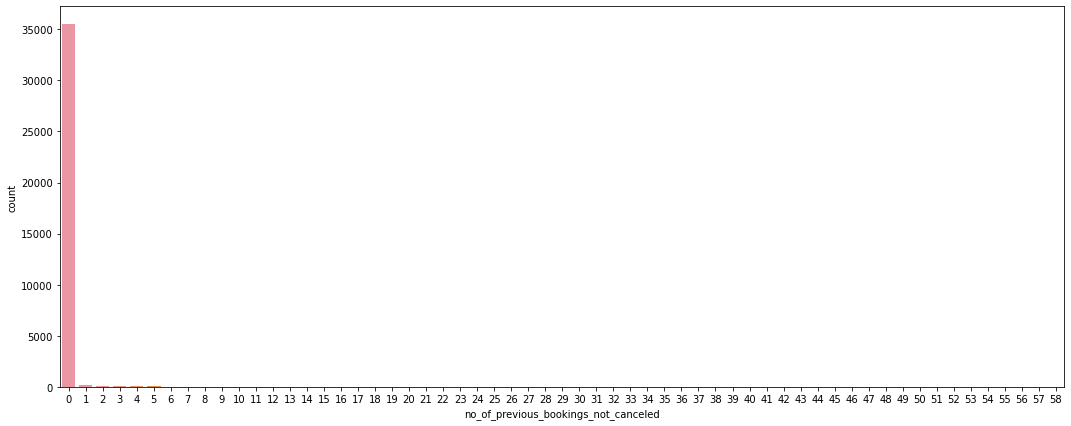

In [25]:
plt.figure(figsize=(18, 7));
sns.countplot(data=data, x="no_of_previous_bookings_not_canceled");

In [26]:
data.no_of_previous_bookings_not_canceled.value_counts()

0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
21        6
20        6
19        6
18        6
17        6
22        6
23        3
24        3
25        3
27        3
32        2
44        2
31        2
30        2
29        2
48        2
28        2
26        2
38        1
33        1
58        1
34        1
35        1
57        1
36        1
56        1
37        1
55        1
54        1
45        1
39        1
53        1
40        1
52        1
41        1
51        1
42        1
50        1
43        1
49        1
47        1
46        1
Name: no_of_previous_bookings_not_canceled, dtype: int64

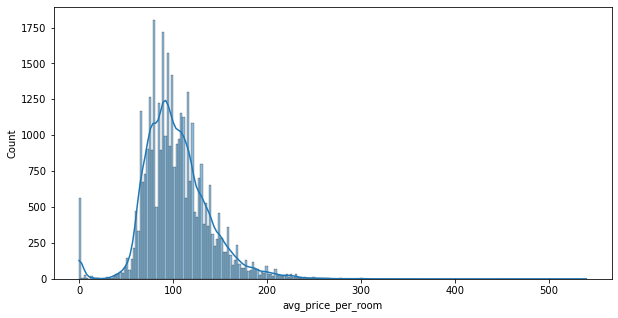

In [27]:
plt.figure(figsize=(10,5));
sns.histplot(data=data, x="avg_price_per_room", kde=True);

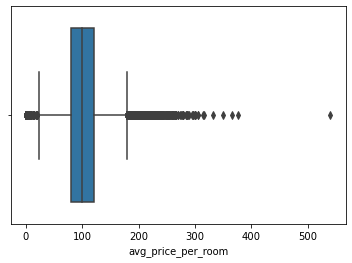

In [28]:
sns.boxplot(data=data, x="avg_price_per_room");

#### Observations
* Average price per room is around 100 Euros.
* Price distribution is heavily skewed to the right

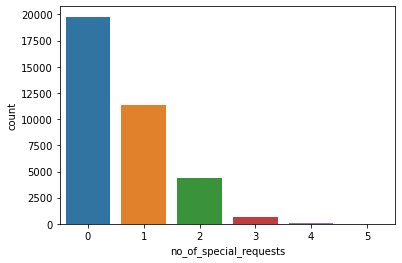

In [29]:
sns.countplot(data=data, x="no_of_special_requests");

#### Observations
* Most guests did not have any special requests

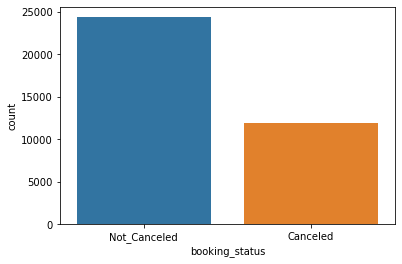

In [30]:
sns.countplot(data=data, x="booking_status");

In [31]:
print(data.booking_status.value_counts(normalize=True))

Not_Canceled   0.67236
Canceled       0.32764
Name: booking_status, dtype: float64


#### Observations
* 67% of guests did not cancel their reservation

### Bivariate Analysis

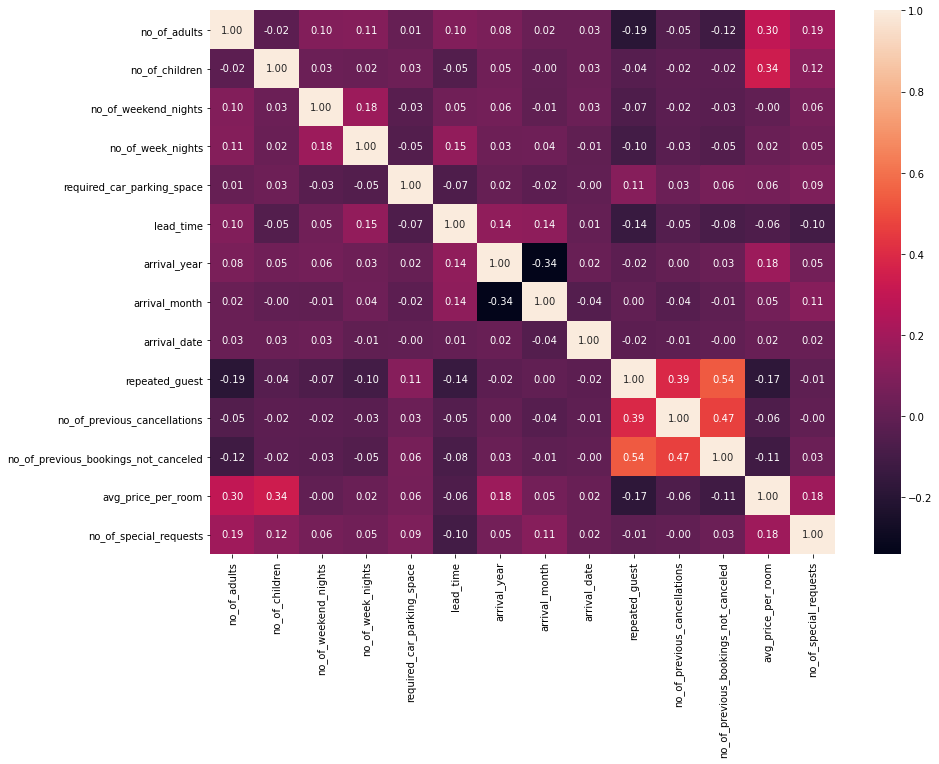

In [32]:
plt.figure(figsize=(14, 10))
sns.heatmap(data=data.corr(), annot=True, fmt=".2f");

#### Observation
* No variables have a correlation either positive or negative value greater than 0.68.
* No furthur bivariate analsyis will be carried out

### Multivariate Analysis

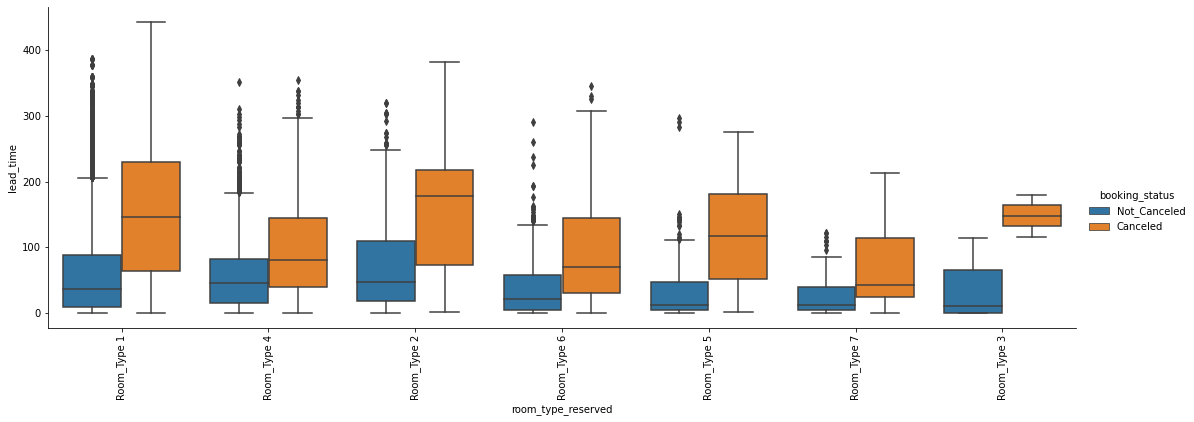

In [33]:
sns.catplot(data=data, y="lead_time", x="room_type_reserved", hue="booking_status", kind="box", aspect=3);
plt.xticks(rotation=90);

#### Observation
* Canelations were higher across all room types for customers with an longer lead time. 

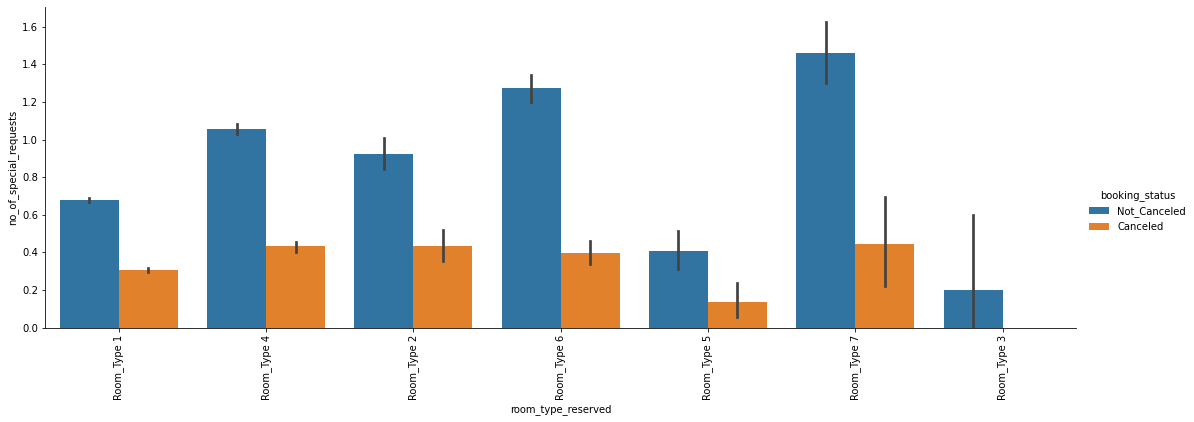

In [34]:
sns.catplot(data=data, y="no_of_special_requests", x="room_type_reserved", hue="booking_status", kind="bar", aspect=3);
plt.xticks(rotation=90);

#### Observations
* The customers with her additional requests do not cancel their bookings as frequently as those who do not.

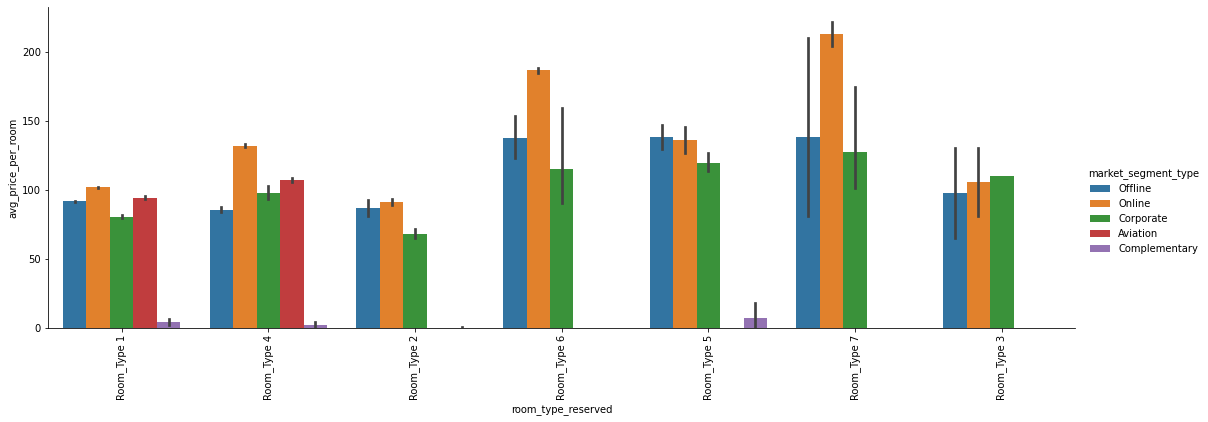

In [35]:
sns.catplot(data=data, y="avg_price_per_room", x="room_type_reserved", hue="market_segment_type", kind="bar", aspect=3);
plt.xticks(rotation=90);

#### Observations
* The price per room for online reservations were the highest per room type.

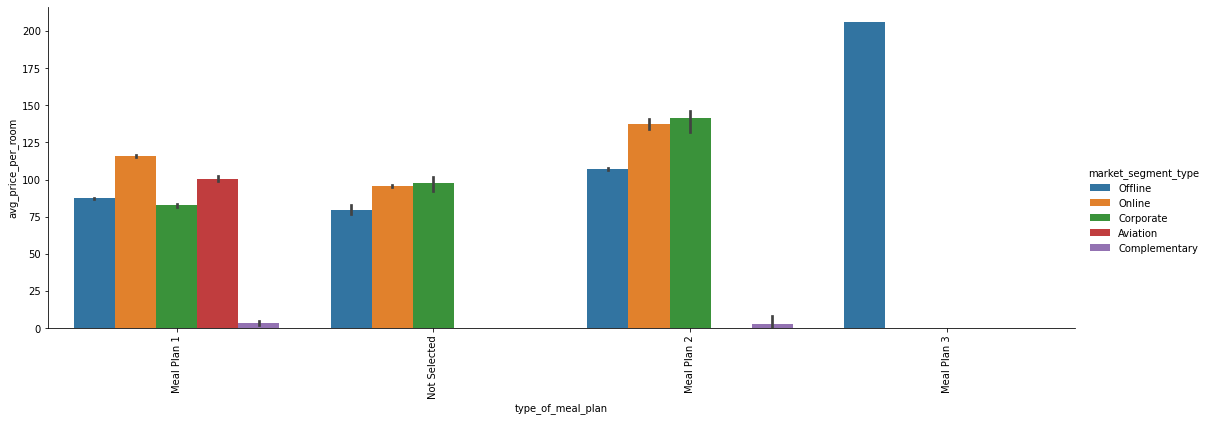

In [36]:
sns.catplot(data=data, y="avg_price_per_room", x="type_of_meal_plan", hue="market_segment_type", kind="bar", aspect=3);
plt.xticks(rotation=90);

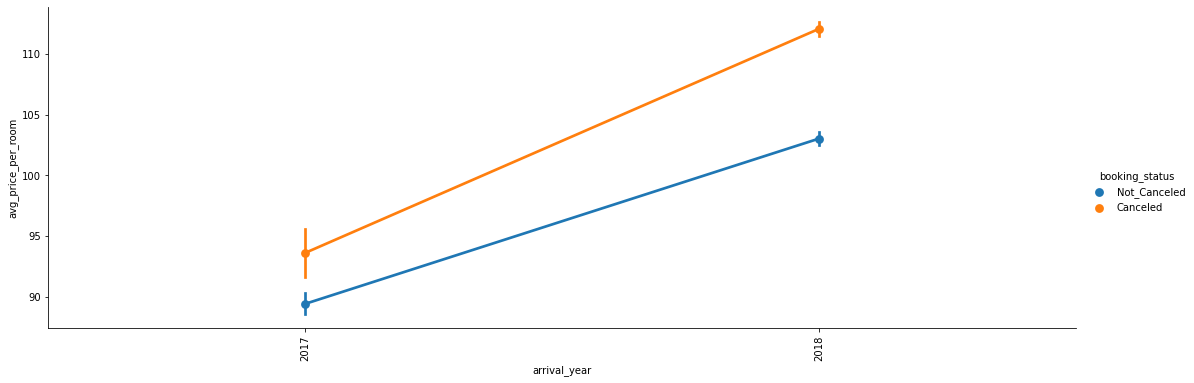

In [37]:
sns.catplot(data=data, y="avg_price_per_room", x="arrival_year", hue="booking_status", kind="point", aspect=3);
plt.xticks(rotation=90);

#### Observations
* The average price per room was higher in 2018 than in 2018 for all bookings

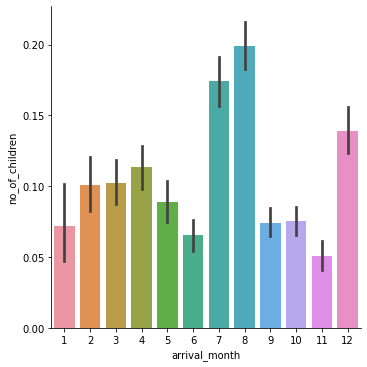

In [38]:
sns.catplot(data=data, x="arrival_month", y="no_of_children", kind="bar");

In [39]:
data_mod=data.copy()
#Total number of nights spent
data_mod["stay_dur"]=data_mod["no_of_weekend_nights"]+data_mod["no_of_weekend_nights"]
#Total number of guests
data_mod["total_occ"]=data_mod["no_of_adults"]+data_mod["no_of_children"]

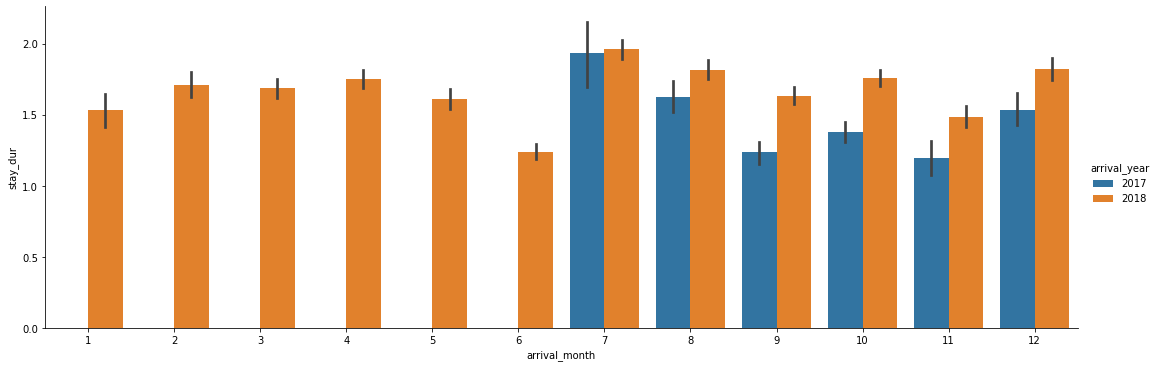

In [40]:
sns.catplot(data=data_mod, y="stay_dur", x="arrival_month", hue="arrival_year", kind="bar", aspect=3);

#### Observations
* Customers stayed longer in 2018 than in 2017.

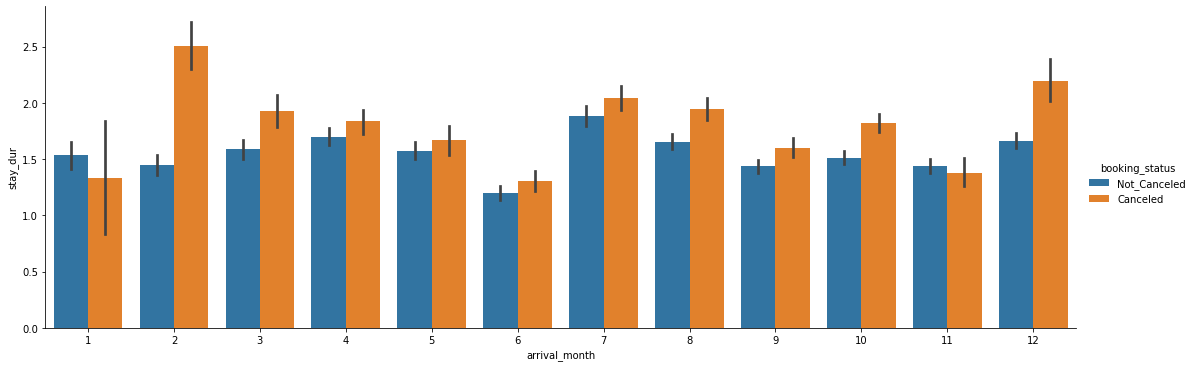

In [41]:
sns.catplot(data=data_mod, y="stay_dur", x="arrival_month", hue="booking_status", kind="bar", aspect=3);

#### Observation
* Most cancleations happen in February and December.
* These two months also have the highest difference in not canceled and canceled bookings>

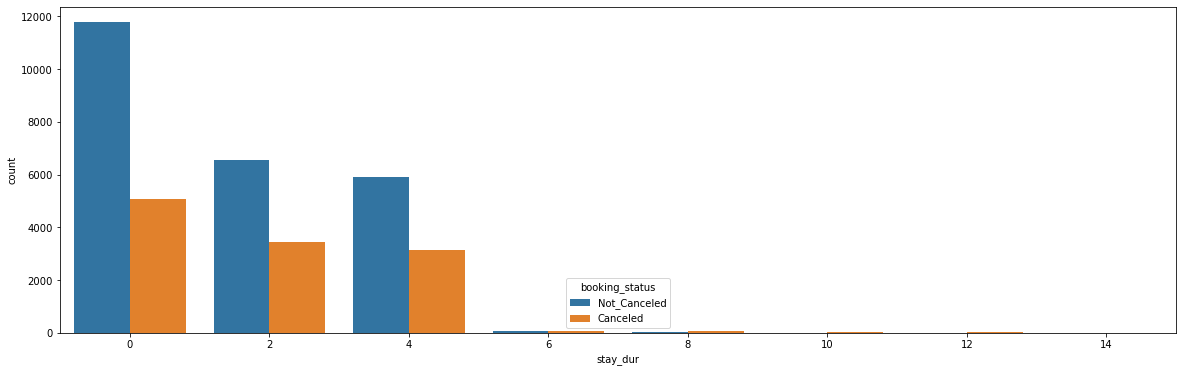

In [42]:
plt.figure(figsize=(20, 6));
sns.countplot(data=data_mod, x="stay_dur",hue="booking_status");

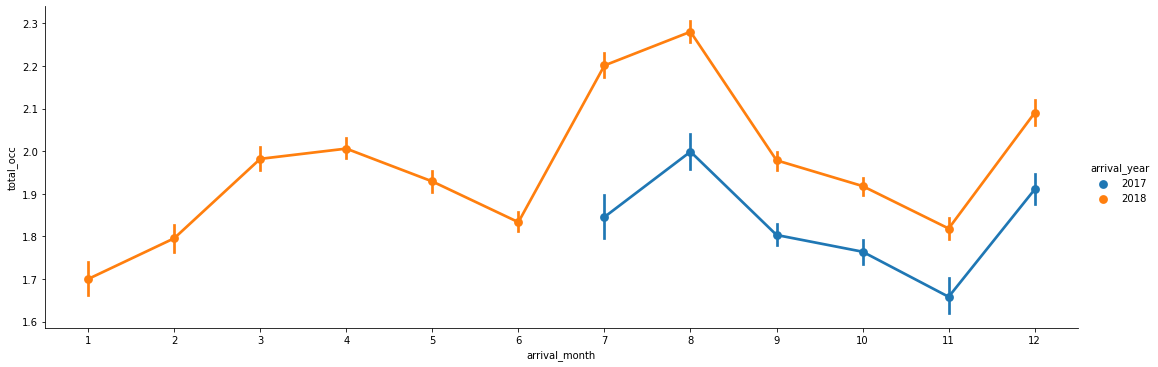

In [43]:
sns.catplot(data=data_mod, y="total_occ", x="arrival_month", hue="arrival_year", kind="point", aspect=3);

#### Observation
* The total number of occupants was higher in 2018 than in 2019

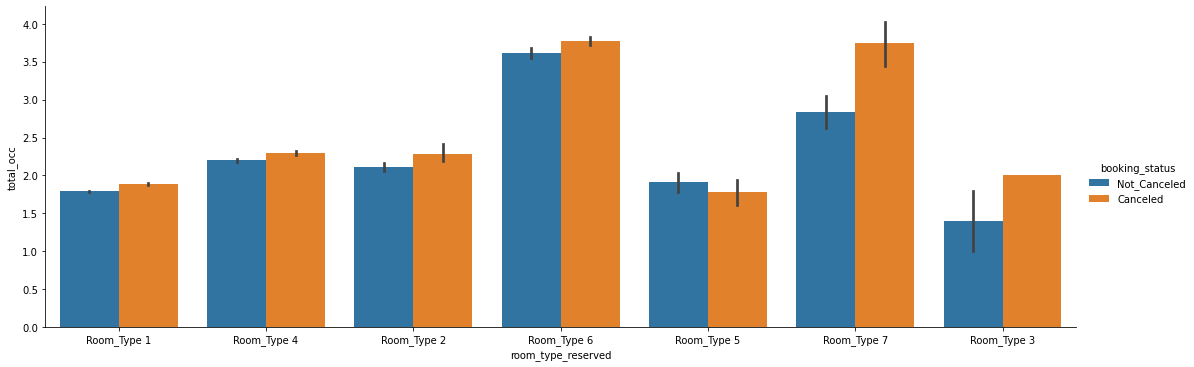

In [44]:
sns.catplot(data=data_mod, y="total_occ", x="room_type_reserved", hue="booking_status", kind="bar", aspect=3);

#### Observations
* Room type 6 has the highest occupancy.


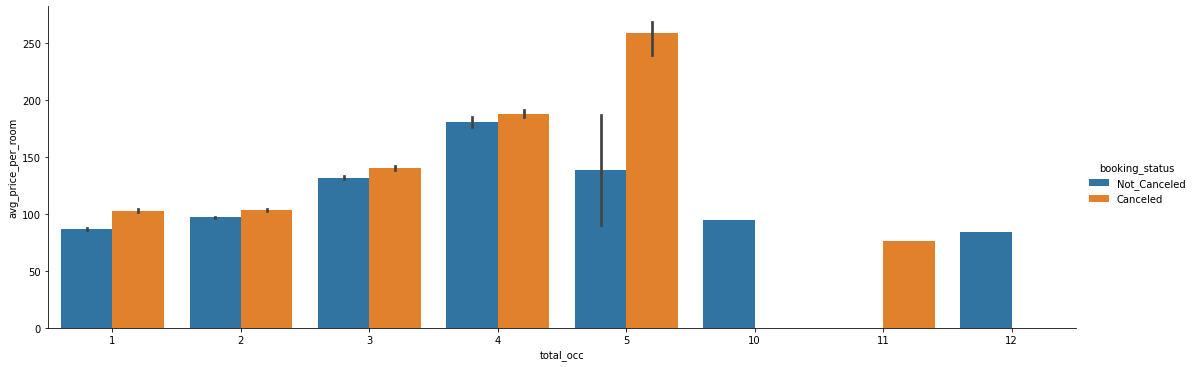

In [45]:
sns.catplot(data=data_mod, x="total_occ", y="avg_price_per_room", hue="booking_status", kind="bar", aspect=3);

#### Observation
* Bookings with 5 total occupants had the highest average price per room. This type of booking also corresponded to the highest cancellations



## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### Outlier Detection


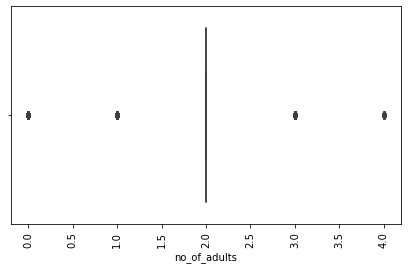

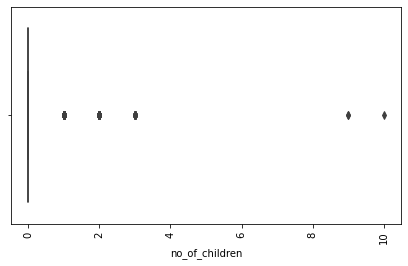

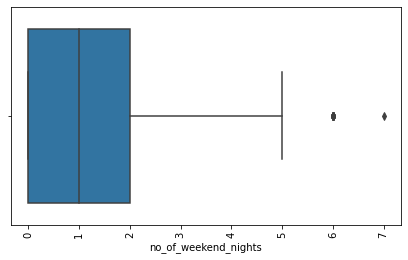

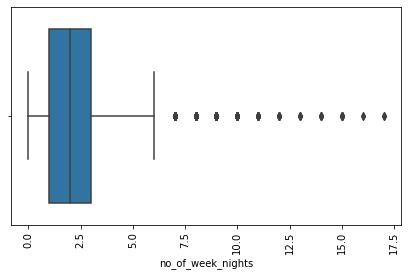

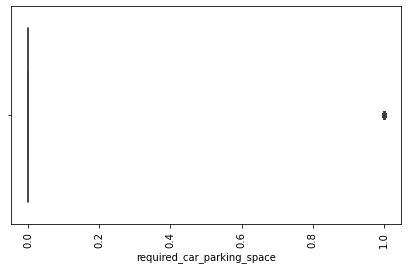

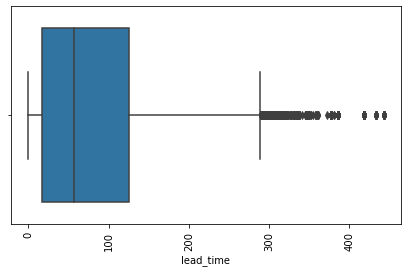

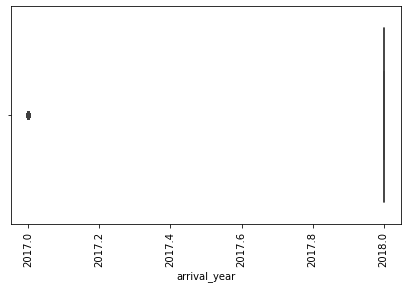

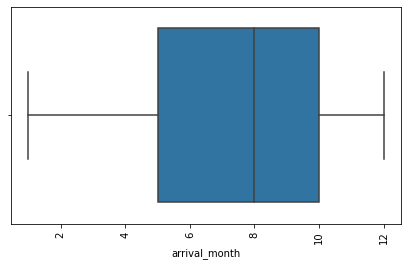

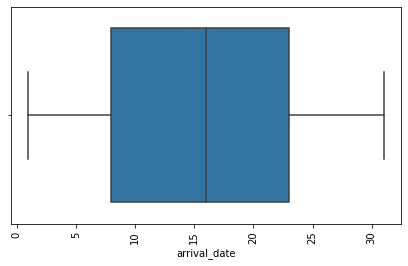

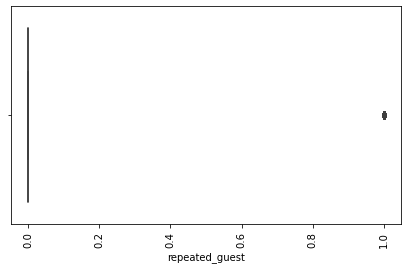

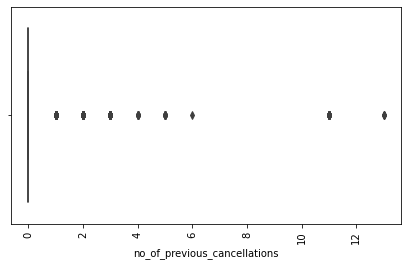

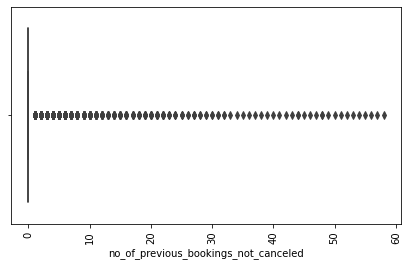

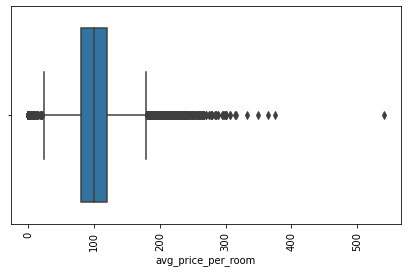

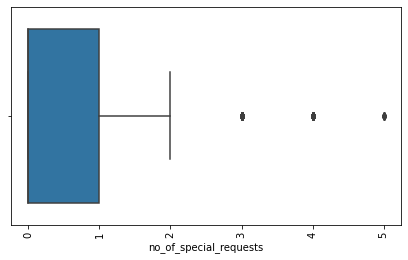

In [46]:
number_only=data.select_dtypes(exclude=["object"])
for i in number_only.columns:
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=data, x=i)
    plt.xticks(rotation=90)
    plt.show()
    

In [47]:
#COnverting the booking status to 1 or 0 for easier analysis
data_num= {"booking_status":     {"Canceled": 1, "Not_Canceled": 0}}

data=data.replace(data_num)
data.sample(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
29151,2,0,0,2,Meal Plan 2,0,Room_Type 1,102,2017,10,16,Offline,0,0,0,101.50000,0,1
21604,1,0,0,1,Meal Plan 1,0,Room_Type 1,43,2018,6,8,Online,0,0,0,80.39000,2,0
6768,2,0,0,4,Meal Plan 1,0,Room_Type 1,1,2018,2,10,Online,0,0,0,93.00000,2,0
19055,1,0,0,1,Meal Plan 1,0,Room_Type 1,10,2017,12,24,Online,0,0,0,81.00000,2,0
4049,2,0,2,3,Meal Plan 1,0,Room_Type 1,6,2018,4,22,Online,0,0,0,91.44000,1,0
15514,2,0,2,1,Meal Plan 1,0,Room_Type 4,28,2018,3,5,Online,0,0,0,105.80000,0,1
27843,2,0,2,3,Meal Plan 1,0,Room_Type 1,19,2018,11,13,Offline,0,0,0,80.00000,0,0
4199,3,0,1,3,Meal Plan 1,0,Room_Type 1,35,2018,9,5,Online,0,0,0,118.80000,0,0
36191,2,0,0,3,Meal Plan 1,0,Room_Type 1,304,2018,11,3,Offline,0,0,0,89.00000,0,1
22707,2,0,0,2,Meal Plan 1,0,Room_Type 1,65,2018,3,11,Online,0,0,0,78.30000,1,0


#### Observations
* There are outliers in the data. They will be included in building the model
* There are no missing values that need to be addressed

### Model Building


In [48]:
# splitting the data into the dependent and independent variables
X = data.drop("booking_status", axis=1)
y = data["booking_status"]

In [49]:
# creating dummy variables for the independent variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00000,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68000,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50000,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [50]:
# this adds the constant term to the dataset
X = sm.add_constant(X)


In [51]:
#Splitting the data into training and testing by the ratio 7:3
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

## EDA

- It is a good idea to explore the data once again after manipulating it.

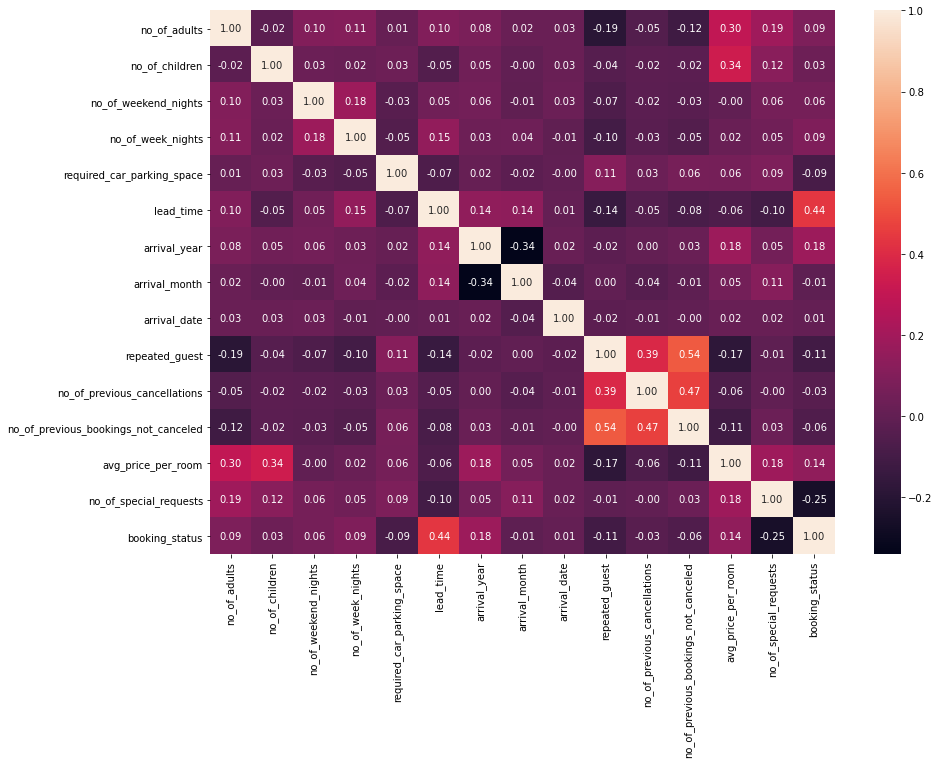

In [52]:
### Bivariate Analysis
plt.figure(figsize=(14, 10))
sns.heatmap(data=data.corr(), annot=True, fmt=".2f");

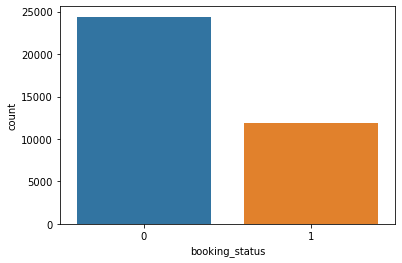

In [53]:
sns.countplot(data=data, x="booking_status");

In [54]:
print(data.booking_status.value_counts(normalize=True))

0   0.67236
1   0.32764
Name: booking_status, dtype: float64


#### Observation
* Converting booking status to binary values did not affect the distribution of canceled bookings
* Correlation heat map remained the same after data manipulation
* No 2 variables had a positive or negative correlation greater than 0.68

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [55]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [56]:
#Calculating the VIF of each column
checking_vif(X_train)

,feature,VIF
0,const,39468156.70600
1,no_of_adults,1.34815
2,no_of_children,1.97823
3,no_of_weekend_nights,1.06948
4,no_of_week_nights,1.09567
5,required_car_parking_space,1.03993
6,lead_time,1.39491
7,arrival_year,1.43083
8,arrival_month,1.27567
9,arrival_date,1.00674


In [57]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [58]:
col_list=["market_segment_type_Corporate", "market_segment_type_Offline", "market_segment_type_Online"]
res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,market_segment_type_Online,0.34430,0.38058
1,market_segment_type_Corporate,0.34402,0.38066
2,market_segment_type_Offline,0.34328,0.38087


#### Observation
* There is no significant drop in R-squared values from dropping each of the columns.



In [59]:
# Dropping corporate market segment and comparing VIF
col_to_drop = "market_segment_type_Corporate"
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  market_segment_type_Corporate


,feature,VIF
0,const,39398297.48593
1,no_of_adults,1.34412
2,no_of_children,1.97810
3,no_of_weekend_nights,1.06742
4,no_of_week_nights,1.09382
5,required_car_parking_space,1.03992
6,lead_time,1.39417
7,arrival_year,1.42861
8,arrival_month,1.27519
9,arrival_date,1.00672


In [60]:
col_to_drop = "market_segment_type_Online"
X_train3 = X_train2.loc[:, ~X_train2.columns.str.startswith(col_to_drop)]
X_test3 = X_test2.loc[:, ~X_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  market_segment_type_Online


,feature,VIF
0,const,39391371.31459
1,no_of_adults,1.29385
2,no_of_children,1.97411
3,no_of_weekend_nights,1.06190
4,no_of_week_nights,1.09043
5,required_car_parking_space,1.03791
6,lead_time,1.37696
7,arrival_year,1.42838
8,arrival_month,1.27376
9,arrival_date,1.00606


#### Observation
* After removing market_segment_type_Offline, all the remaining columns had a VIF<5. 
* No furthur columns need to be dropped

## Building a Logistic Regression model

In [61]:
olsmodel2 = sm.OLS(y_train, X_train3).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:         booking_status   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     528.2
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:10:14   Log-Likelihood:                -11536.
No. Observations:               25392   AIC:                         2.312e+04
Df Residuals:                   25366   BIC:                         2.334e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


#### Observation
* The model has an R-squared value of 34.2%. 
* This corresponds to the 32.77% of the population that cancelled their bookings.
* The model therefore can fully account for the canceled bookings

### Dropping high P values
Dropping the columns whose p-value is >0.05(5%)

In [62]:
# initial list of columns
cols = X_train3.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train3[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Offline']


In [63]:
X_train4= X_train3[selected_features]
X_test4= X_test3[selected_features]
olsmodel3 = sm.OLS(y_train, X_train4).fit()
print(olsmodel3.summary())

                            OLS Regression Results                            
Dep. Variable:         booking_status   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     694.7
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:10:18   Log-Likelihood:                -11539.
No. Observations:               25392   AIC:                         2.312e+04
Df Residuals:                   25372   BIC:                         2.328e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


## Model performance evaluation

In [64]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel3, X_train4, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.38117,0.31484,0.34221,0.34169,inf


In [65]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel3, X_test4, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.37864,0.31156,0.34503,0.34382,inf


#### Observation
* The R-squared value has a difference of 0.003 between the training and testing perfomance.
* The model is neither under nor overfitted.

## Checking Linear Regression Assumptions

In [66]:
# Dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train 
df_pred["Fitted Values"] = olsmodel3.fittedvalues 
df_pred["Residuals"] = olsmodel3.resid 
df_pred.sample(10)

,Actual Values,Fitted Values,Residuals
3028,0,0.18363,-0.18363
7625,0,0.34240,-0.34240
35465,0,0.17644,-0.17644
28503,0,0.09187,-0.09187
18035,1,0.50249,0.49751
30326,0,-0.07003,0.07003
21890,0,0.48189,-0.48189
12480,1,0.29987,0.70013
21682,0,0.06827,-0.06827
416,0,0.05460,-0.05460


### TEST FOR LINEARITY AND INDEPENDENCE


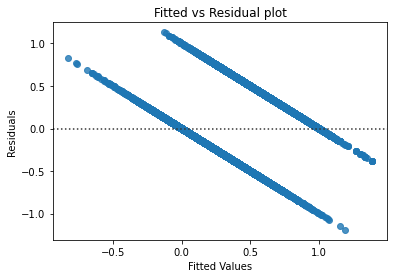

In [67]:
#Checking for patterns in residuals
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### Observation
* There is a clear pattern between the fitted values and residuals.
* The model is therefore not linear 

### Test for normality

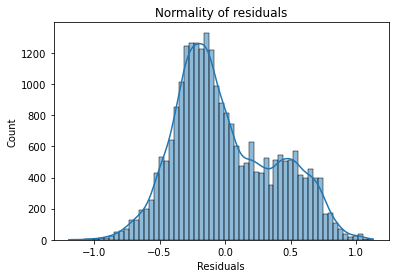

In [68]:
#Distribution of the residuals
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

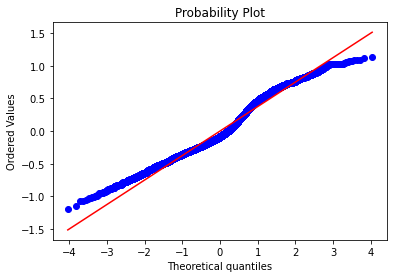

In [69]:
#Q-Q plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

### Shapiro test
For this hypothesis test, the null hypothesis is:
> $H_0$ The residuals are normally distributed
> 
Alternate Hypothesis
> $H_a$ The residuals are not normally distributed

In [70]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9686029553413391, pvalue=0.0)

#### Observation
* The p -value from the Shapiro test is less than 0.05. There is sufficient evidence to reject the null hypothesis.
* The histogram of the distribution of residues indicates a bimodial distribution
* The Q-Q plot shows a good amount of residuals lie on the 45 degree line


### Homoscedastic
Null hyptothesis:
> $H_0$The residuals are homoscedastic
> 
Alternate Hypothesis
> $H_a$ The residuals are not homoscedastic(heteroscedastic)

In [71]:
#Importing the relevant libraries
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train4)
lzip(name, test)

[('F statistic', 1.012292846995126), ('p-value', 0.24579648828158385)]

#### Observation
* The p-value is greater than 0.05. Therefore there is insufficient evidence to reject the null hypothesis.
* The residuals are homoscedastic

## Final Model Summary

In [72]:
x_train_final = X_train4.copy()
x_test_final = X_test4.copy()
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:         booking_status   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     694.7
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:11:11   Log-Likelihood:                -11539.
No. Observations:               25392   AIC:                         2.312e+04
Df Residuals:                   25372   BIC:                         2.328e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


## Building a Decision Tree model

In [73]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(x_train_final, y_train)

DecisionTreeClassifier(random_state=1)

In [74]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [75]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Checking model performance on training set

In [76]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, x_train_final, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99346,0.98446,0.99565,0.99002


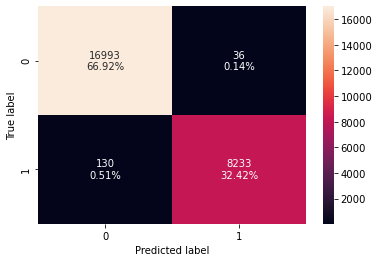

In [77]:
confusion_matrix_sklearn(model, x_train_final, y_train)

In [78]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, x_test_final, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.86355,0.79500,0.78585,0.79040


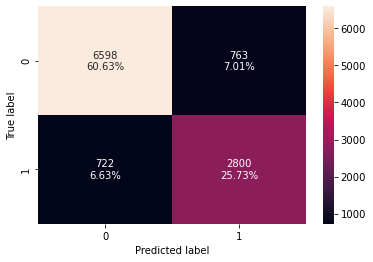

In [79]:
confusion_matrix_sklearn(model, x_test_final, y_test)

#### Observations
* The cost of a False Negative(Customer cancels but model classifies them as will not cancel) is higher than the cost of a False Postivie.
* The recall variable is used as the metric for the decision tree.
* The model gets ~80% of the classifications on the training data right.

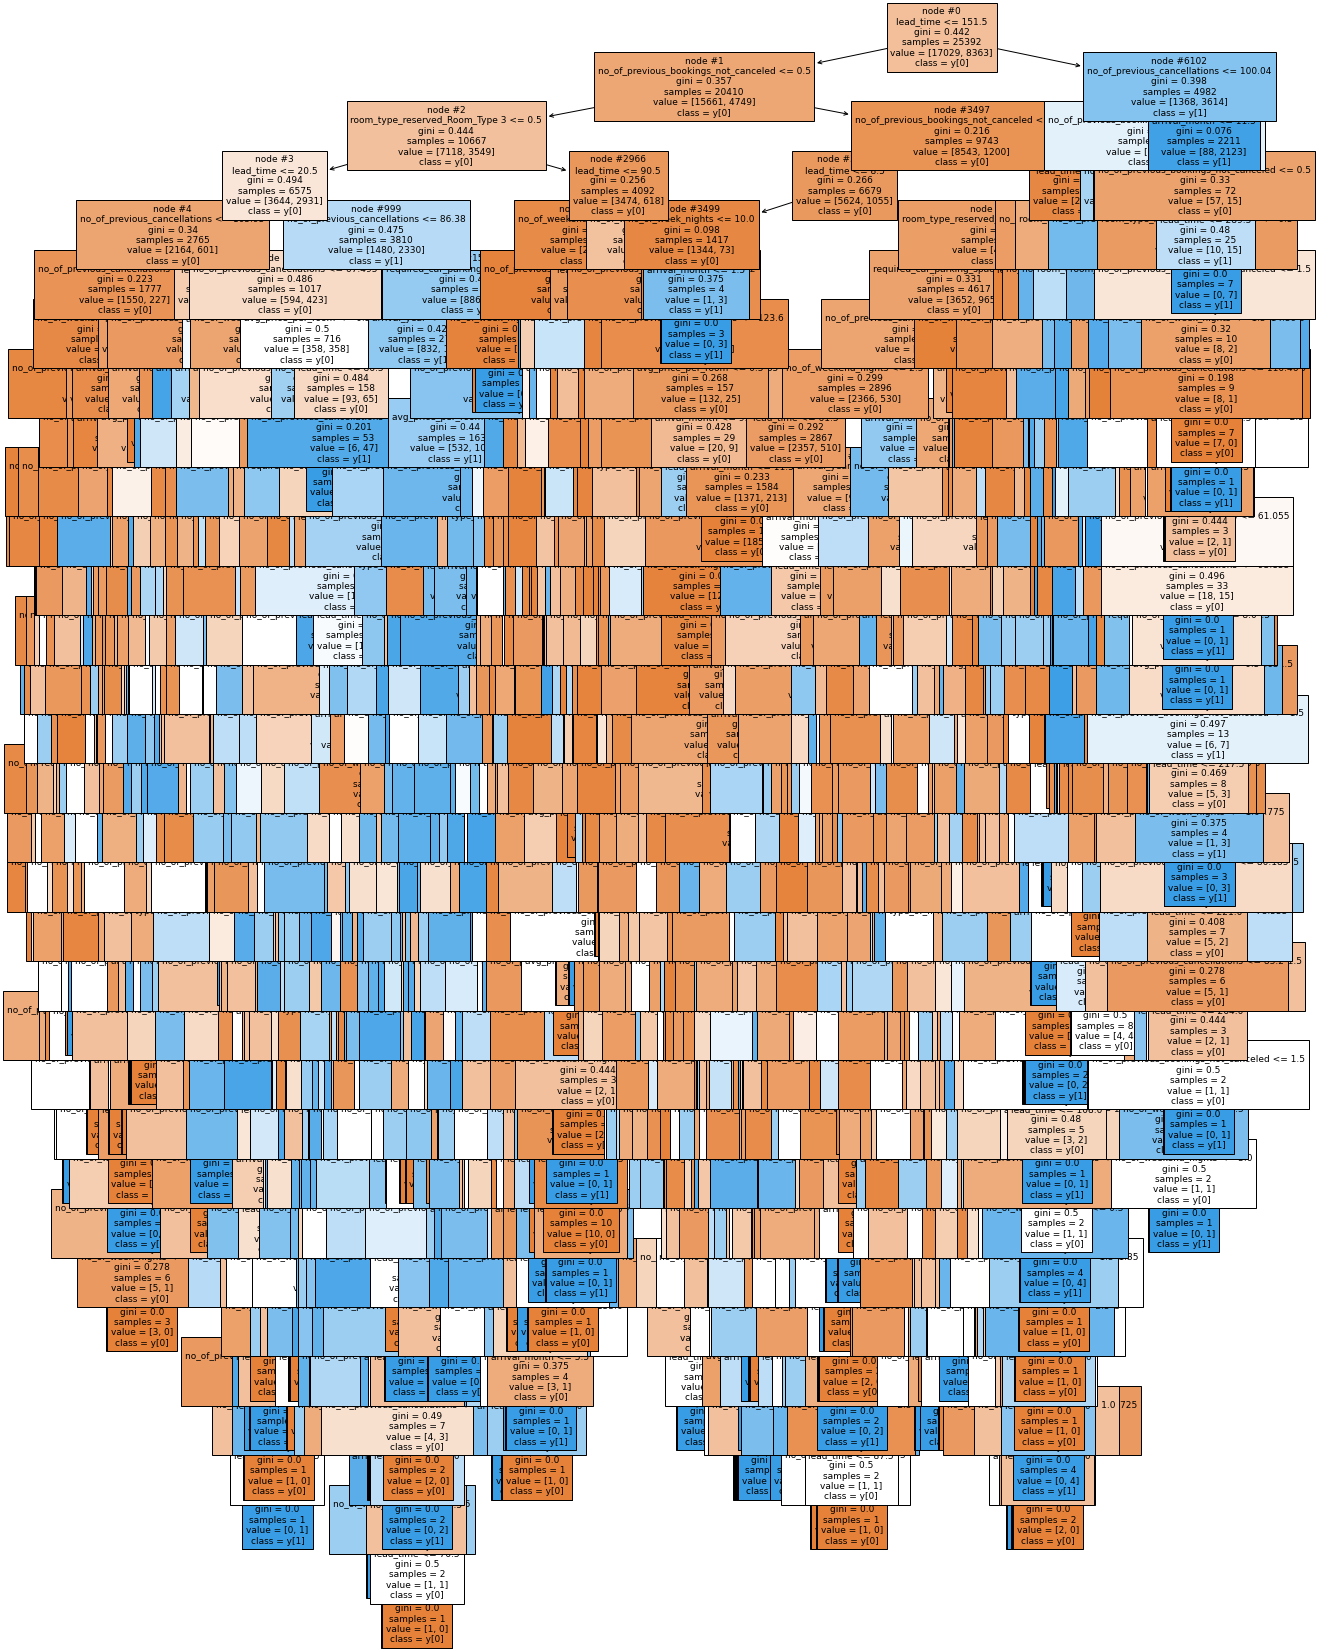

In [81]:
column_names = list(X.columns)
feature_names = column_names
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

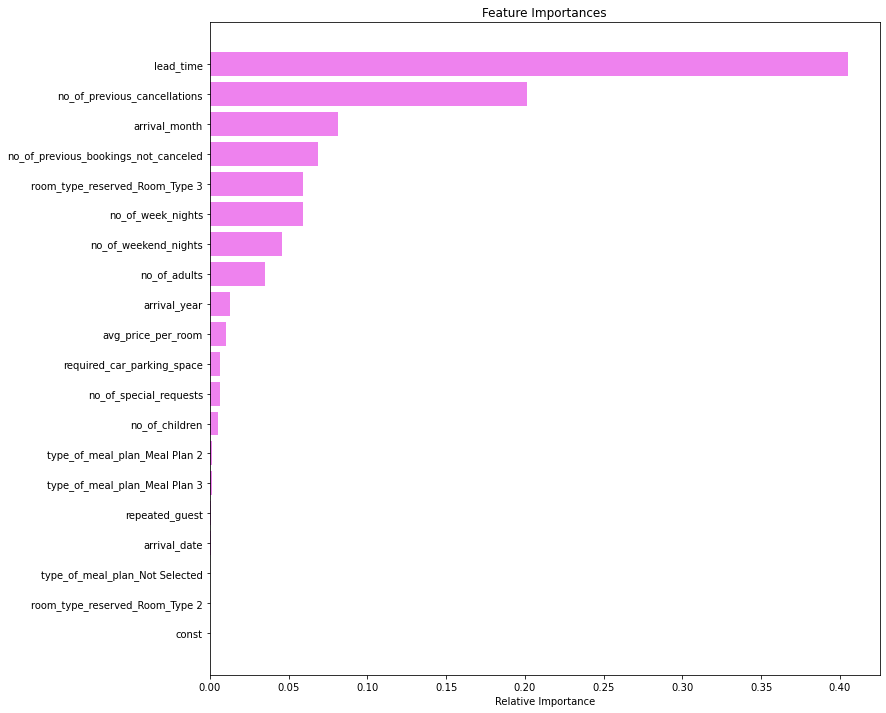

In [82]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [83]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train_final, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train_final, y_train)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=1e-06,
                       random_state=1)

In [84]:
#Checking model on Training data
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, x_train_final, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.99346,0.98446,0.99565,0.99002


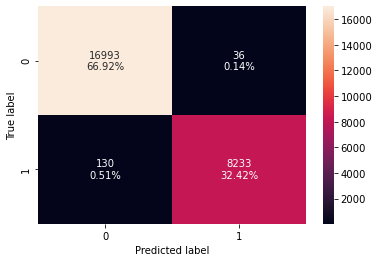

In [85]:
confusion_matrix_sklearn(estimator, x_train_final, y_train)

In [86]:
#Checking model on Training data
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, x_test_final, y_test
)

decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.86943,0.79727,0.79886,0.79807


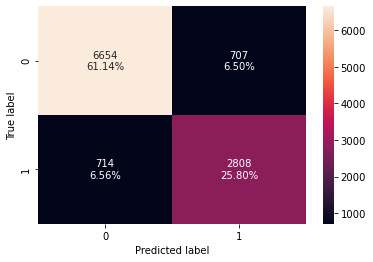

In [87]:
confusion_matrix_sklearn(estimator, x_test_final, y_test)

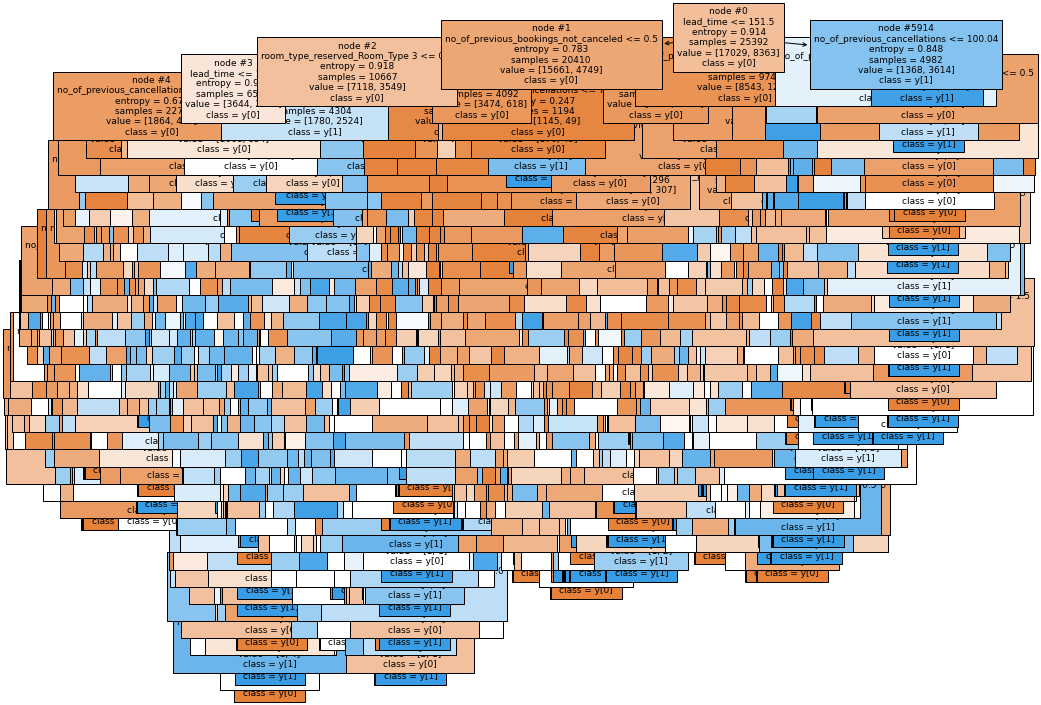

In [88]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [89]:
###Cost complexity pruning(Post)
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train_final, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00842
1,0.00000,0.00842
2,0.00000,0.00842
3,0.00000,0.00842
4,0.00000,0.00842
...,...,...
1463,0.00454,0.28027
1464,0.00659,0.29344
1465,0.01726,0.31070
1466,0.01816,0.36518


## Do we need to prune the tree?

#### Yes, there is a need to prune the tree. <br>
The model is prone to wrongly classifying who will cancel their bookings. <br>
    - False Negative customers are those the model predicts to not defaulting but end up canceling.<br>
    - False Positive customers are those the model predicts to default but the customer shows up.<br>
Pruning helps inprove the Recell of the model. Recell is the metric for determing the fraction of the defaulters the model accurately predicts. <br>

## Model Performance Comparison and Conclusions

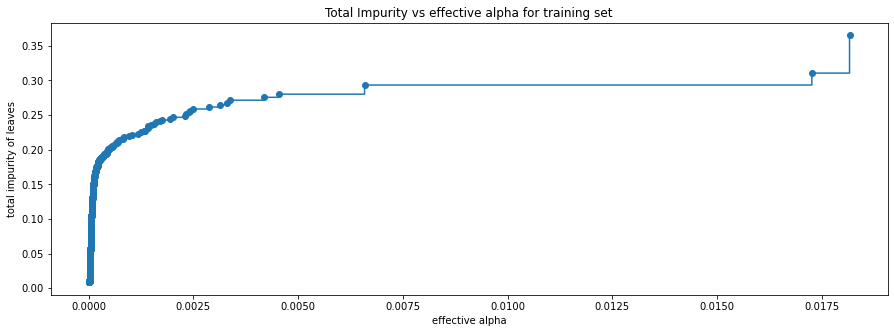

In [90]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

#### Observations
* The higher the alpha(complexity parameter), the simpler the model.
* Simpler models cannot filter data accurately and have more impurities in the leaves.

In [91]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train_final, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07657789477371352


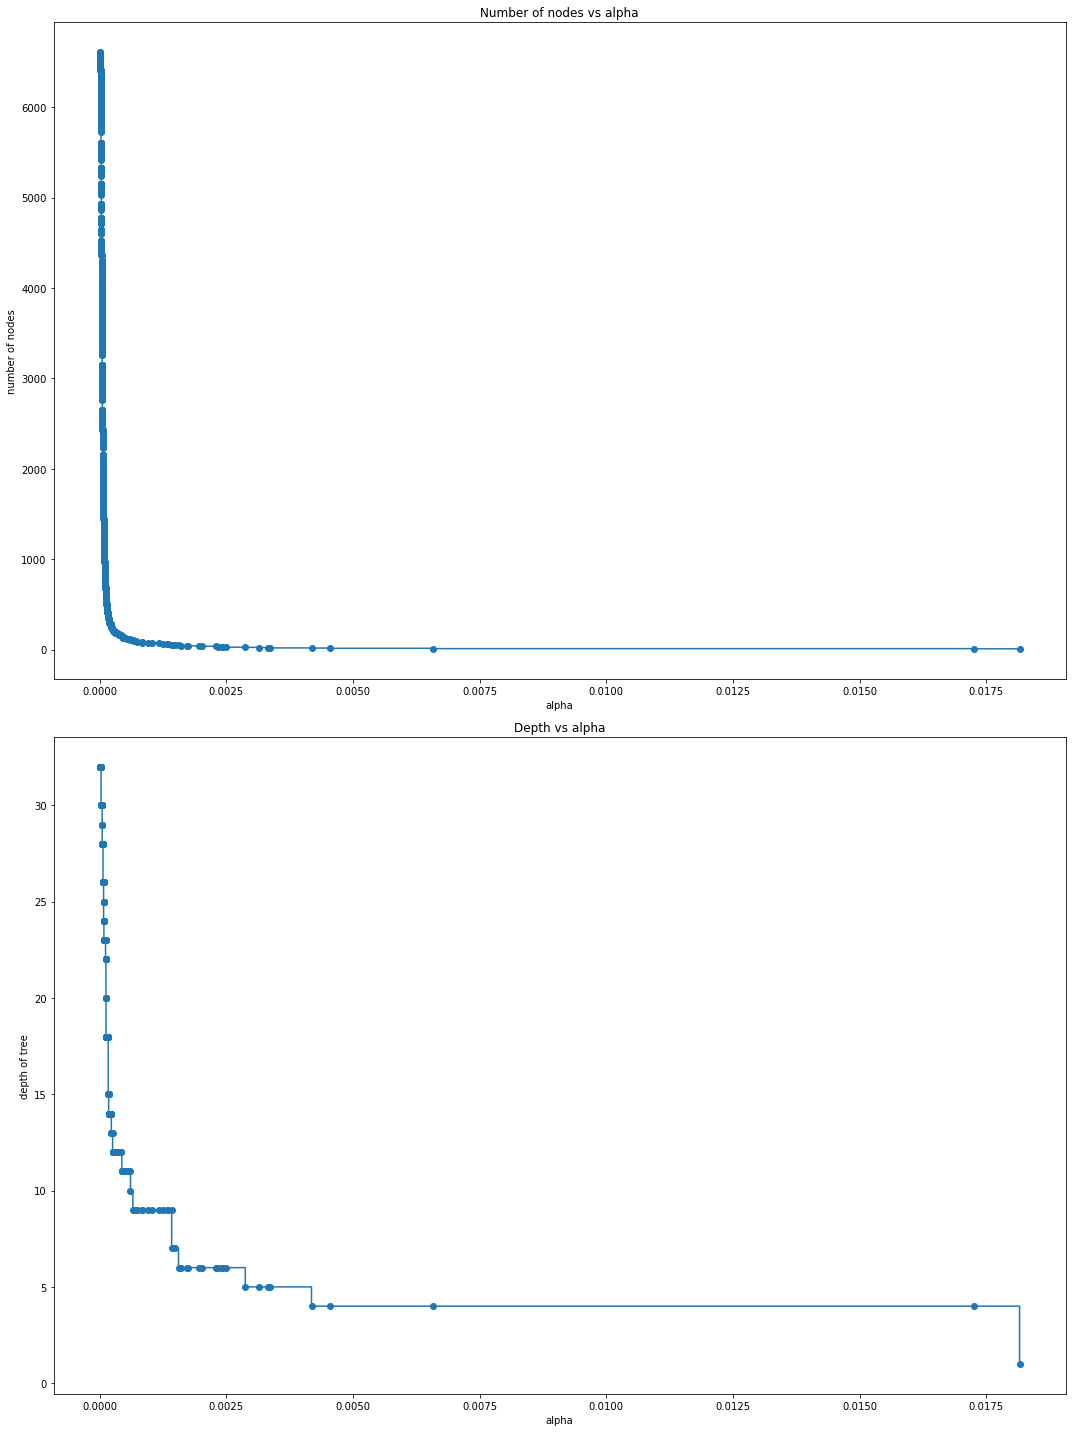

In [92]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(15, 20))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Observations
* As the complex parameter increases, the tree depth decreases. This results in a simple tree


In [93]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(x_train_final)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [94]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(x_test_final)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

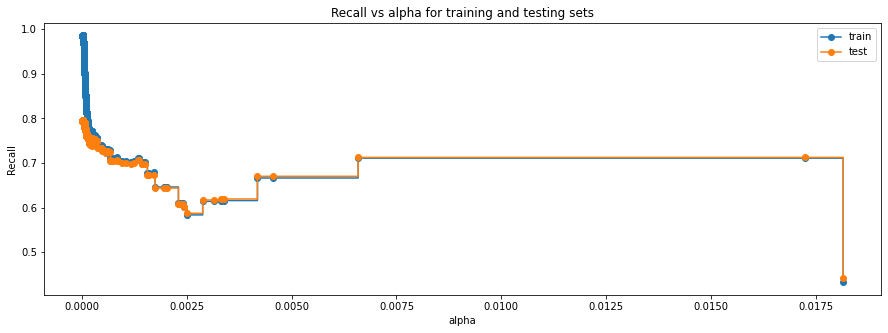

In [95]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [96]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=1.8378491913463562e-05, random_state=1)


#### Observation
* The difference in the train and test plot indicates that the model is not overfitted.
* From the calculation and the graph, the best alpha value is approximately 0.000018

In [97]:
#Analysing the perfomance metrics based on the tree designed using the optimal alpha value
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, x_train_final, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.99334,0.98601,0.99373,0.98986


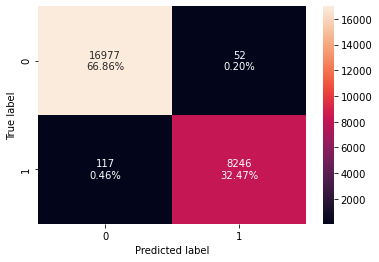

In [98]:
confusion_matrix_sklearn(best_model, x_train_final, y_train)

#### Checking model performance on test set

In [99]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, x_test_final, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.86355,0.79671,0.78490,0.79076


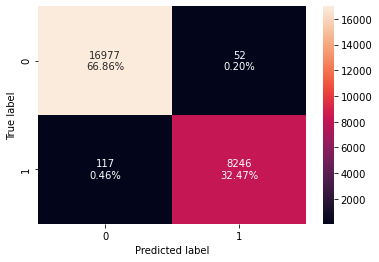

In [100]:
confusion_matrix_sklearn(best_model, x_train_final, y_train)

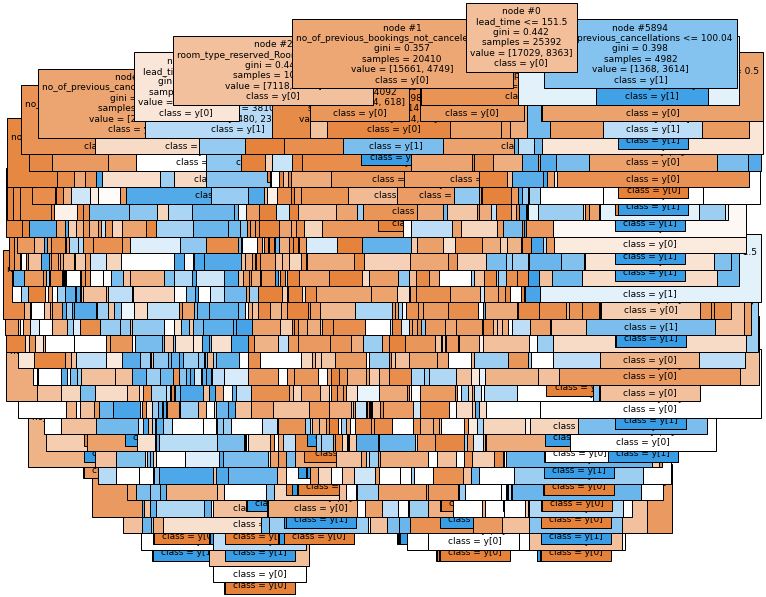

In [101]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

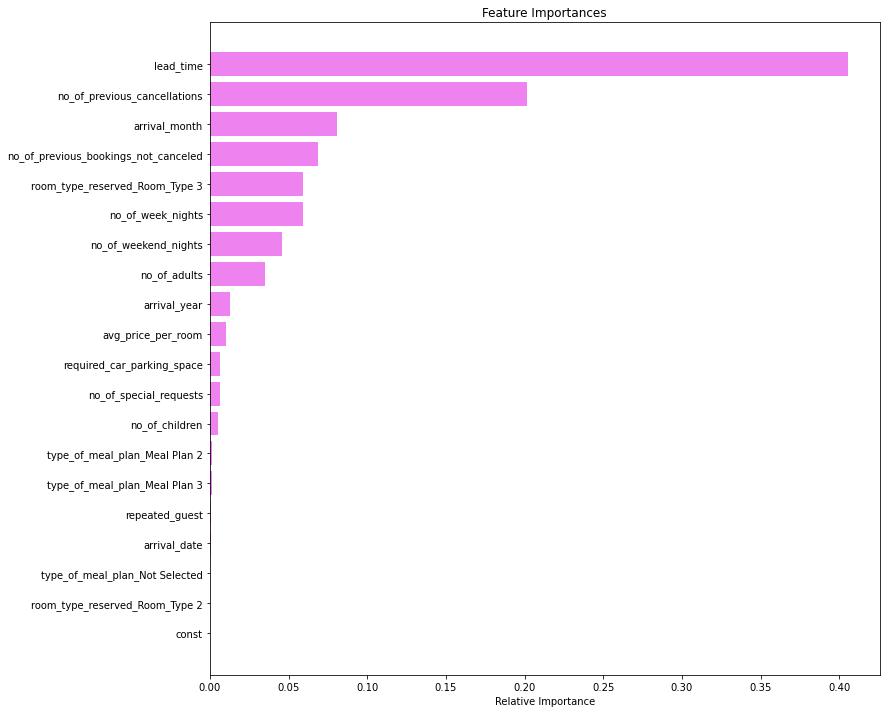

In [102]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [103]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99346,0.99346,0.99334
Recall,0.98446,0.98446,0.98601
Precision,0.99565,0.99565,0.99373
F1,0.99002,0.99002,0.98986


In [104]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.86355,0.86943,0.86355
Recall,0.79500,0.79727,0.79671
Precision,0.78585,0.79886,0.78490
F1,0.79040,0.79807,0.79076


#### Observations
* Post Pruning was more effective than pre pruning
* Although by  a small margin, post-pruning increases the recall value to ~80%. It also raised the value of all the perfomance metrics

## Actionable Insights and Recommendations


* Reduced refund rate as the check-in date approaches for cancelations. Since most bookings canceled had a lead time of over 100 days on average. Cap the refund window at minimum 100 days.
* Give offers to those who have consistenly gone through with their bookings and not canceled.
* Customers who have have canceled before have a higher chance of canceling future bookings. Secure a non-refundable deposit from these category of customers. The size of deposit required should increase in relation to previous bookings canceled.
* Most cancelations happen in February and most bookings are made in the middle of month(around Valentines). Run promotional offers for couples or pairs close to the date. Data shows less cancelations for shorter lead times.
* Investigate why room type 3 is the most common room for cancelations. For example by taking surveys from guests. 